## Gold Price Prediction
This project will implement a Random Forest Regression model to predict the price of gold.

Dataset: https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data

### Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Data Collection and Preprocessing

In [3]:
# load data 
df = pd.read_csv('gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.shape

(2290, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
# check for null values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
# statistical measures
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Correlation

In [8]:
corr = df.corr()

C:\Users\niles\AppData\Local\Temp\ipykernel_13384\658818363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

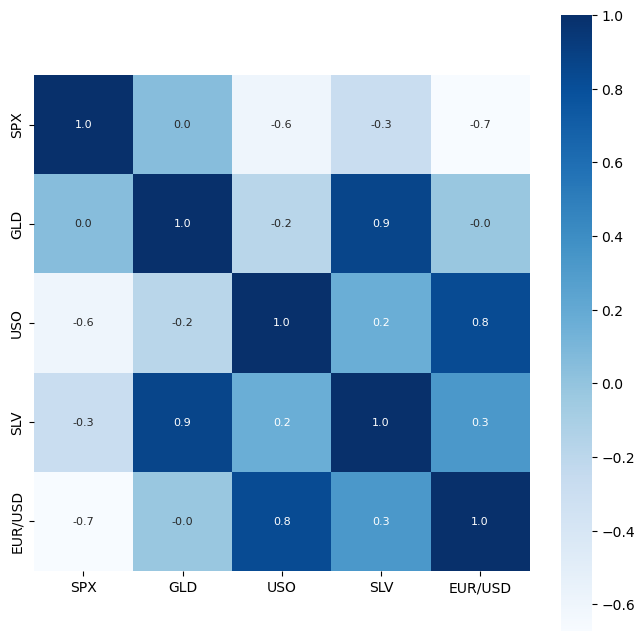

In [10]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
# correlation of values of GLD
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\niles\AppData\Local\Temp\ipykernel_13384\3891313524.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'], color = 'green')


<Axes: xlabel='GLD', ylabel='Density'>

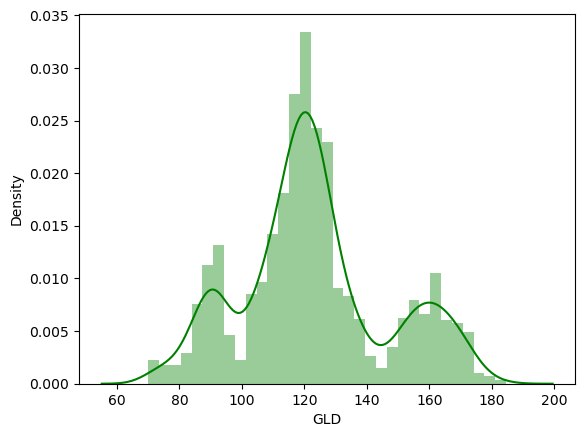

In [12]:
# check distribution of GLD price
sns.distplot(df['GLD'], color = 'green')

### Train Test Split

In [14]:
X = df.drop(['Date', 'GLD'], axis =  1)
y = df['GLD']

print(X)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

### Train Model - Random Forest Regressor

In [16]:
reg = RandomForestRegressor(n_estimators = 30)

In [17]:
# train the model
reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)

### Model Evaluation

In [18]:
# predict on Test data
test_data_predict = reg.predict(X_test)

print(test_data_predict)

[168.78833363  81.7486669  116.1726663  127.4286669  120.81366837
 154.7369978  150.1776662  126.28666643 117.4659986  126.01366733
 116.88100093 171.95233377 141.48099977 167.9653324  115.1006665
 117.4410007  134.7043369  170.2660017  158.3630031  162.28466597
 155.0560005  124.81299953 176.4633331  157.39500247 125.2083332
  93.67766667  78.07999993 120.6833336  118.92699913 167.45700173
  88.26000093 125.28599967  91.3123343  117.75400003 121.1743327
 135.92200063 115.41333487 115.75666733 147.53800053 107.51700117
 104.69366903  87.0696644  126.52000083 118.08699953 154.58833273
 119.37100093 108.4206666  107.99699733  93.14200067 126.98366567
  74.97700037 113.70366603 121.64600037 111.4899984  118.98199893
 120.11033317 158.8636657  168.66266873 146.93699693  85.55733237
  94.1690002   86.73066617  90.64633353 119.09833383 126.4006672
 127.5086674  171.56233217 122.35233293 117.14566593  98.7680006
 168.95433597 143.47033157 131.3673361  121.4110026  119.7033331
 119.80500027 11

In [19]:
# R squared error
err = metrics.r2_score(y_test, test_data_predict)
print("R squared error: %.2f" % err)

R squared error: 0.99


### Compare Predicted vs Actual

In [20]:
y_test = list(y_test)

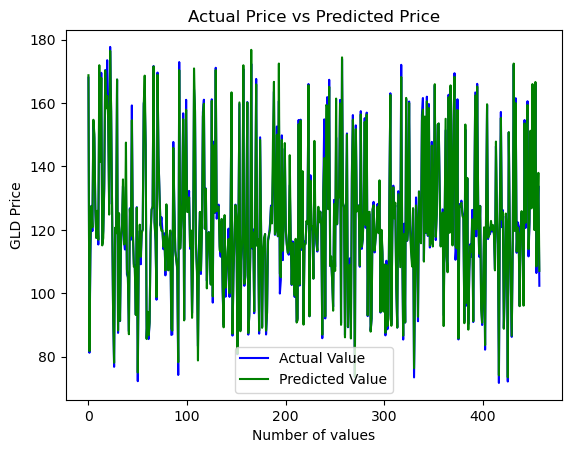

In [22]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_predict, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()